In [2]:
import pandas as pd  
data=pd.read_excel('Wow-2023-02-Data.xlsx')
data

c:\Users\ajink\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Absolute Discount,Billing Country,Close Date Year,List Price,Opportunity Type,Product Family,Product Name,Quantity,Sales Price,Total List Price,Total Price
0,0,USA,2029,0,New Business / Add-on,NaN,NaN,0,0,0,0
1,436275,USA,2029,450,Existing Business,Phones,Space phone 2,1939,225,872550,436275
2,306600,USA,2029,1600,Existing Business,Laptops,Pro laptop,1533,1400,2452800,2146200
3,9070,USA,2029,100,Existing Business,Accessories,Keyboard,907,90,90700,81630
4,84600,Belgium,2029,550,New Business / Add-on,Phones,Space phone 3,1692,500,930600,846000
...,...,...,...,...,...,...,...,...,...,...,...
372,77100,Switzerland,2028,1000,New Business,Tablets,Light tablet 2,514,850,514000,436900
373,264400,Switzerland,2028,600,New Business,Tablets,Mini tablet,1322,400,793200,528800
374,385400,Canada,2029,800,New Business,Tablets,Light tablet,1927,600,1541600,1156200
375,270400,Belgium,2029,800,New Business / Add-on,Tablets,Light tablet,1352,600,1081600,811200


In [3]:
data.shape

(377, 11)

In [4]:
data.nunique()

Absolute Discount    331
Billing Country       25
Close Date Year        2
List Price            45
Opportunity Type       3
Product Family         5
Product Name          17
Quantity             327
Sales Price           49
Total List Price     343
Total Price          345
dtype: int64

In [5]:
data.dtypes

Absolute Discount     int64
Billing Country      object
Close Date Year       int64
List Price            int64
Opportunity Type     object
Product Family       object
Product Name         object
Quantity              int64
Sales Price           int64
Total List Price      int64
Total Price           int64
dtype: object

In [6]:
data.isnull().sum()

Absolute Discount     0
Billing Country       0
Close Date Year       0
List Price            0
Opportunity Type      0
Product Family       32
Product Name         32
Quantity              0
Sales Price           0
Total List Price      0
Total Price           0
dtype: int64

- Is there any duplicated value in the dataset?

In [7]:
data[data.duplicated()]

,Absolute Discount,Billing Country,Close Date Year,List Price,Opportunity Type,Product Family,Product Name,Quantity,Sales Price,Total List Price,Total Price


- Value count of 'Billing country'

In [8]:
data['Billing Country'].value_counts()

Canada            59
USA               57
Japan             31
China             17
India             17
Brazil            17
Normway           16
Germany           15
Sweden            14
Singapore         14
Taiwan            14
Denmark           13
Mexico            10
Belgium           10
Thailand          10
Switzerland        9
Spain              9
Italy              8
Hong Kong          8
Russian            7
Australia          7
United Kingdom     6
Korea              5
France             3
Turkey             1
Name: Billing Country, dtype: int64

In [9]:
data.groupby('Billing Country')['Total Price'].sum()

Billing Country
Australia          2728690
Belgium            6794540
Brazil            14726190
Canada            69382565
China              6327135
Denmark            7082485
France              596230
Germany            9064505
Hong Kong          1917275
India              8361160
Italy              4378015
Japan             21137030
Korea              5960830
Mexico             5003605
Normway            7993050
Russian            2730290
Singapore          6068790
Spain              7476425
Sweden             6910030
Switzerland        2474700
Taiwan            14176735
Thailand           5457090
Turkey                   0
USA               58807025
United Kingdom     2675685
Name: Total Price, dtype: int64

<AxesSubplot: xlabel='Billing Country'>

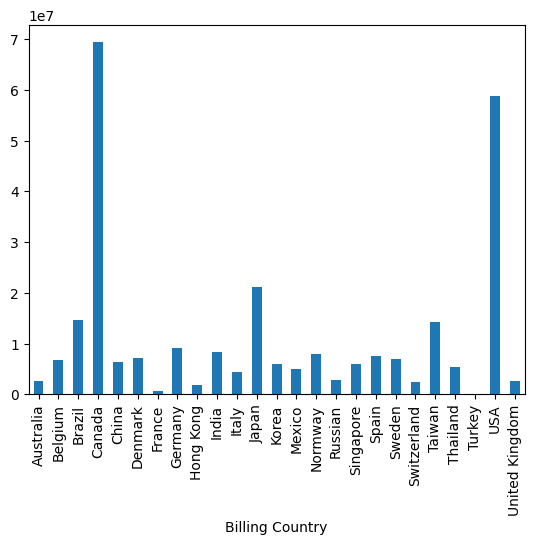

In [10]:
data.groupby('Billing Country')['Total Price'].sum().plot(kind='bar')

- Value count of each 'Opprtunity type'

In [11]:
data['Opportunity Type'].value_counts()

New Business             172
New Business / Add-on    135
Existing Business         70
Name: Opportunity Type, dtype: int64

In [12]:
data.groupby('Opportunity Type')['Total Price'].sum()

Opportunity Type
Existing Business         53882420
New Business             127398700
New Business / Add-on     96948955
Name: Total Price, dtype: int64

- Which business type grows well?

<AxesSubplot: ylabel='Total Price'>

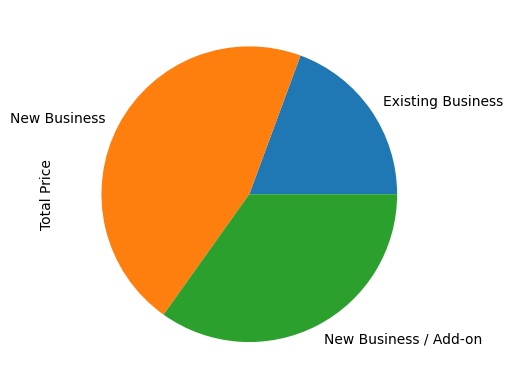

In [13]:
data.groupby('Opportunity Type')['Total Price'].sum().plot(kind='pie')

- Value count of each product in 'Product Family'

In [14]:
data['Product Family'].value_counts()

Accessories      84
Laptops          82
Tablets          69
Phones           57
Digital Media    53
Name: Product Family, dtype: int64

In [15]:
data.groupby('Product Family')['Total Price'].sum()

Product Family
Accessories        8204845
Digital Media     16409880
Laptops          165314800
Phones            33838450
Tablets           54462100
Name: Total Price, dtype: int64

- Which product has highest Price in dataset

<AxesSubplot: xlabel='Product Family'>

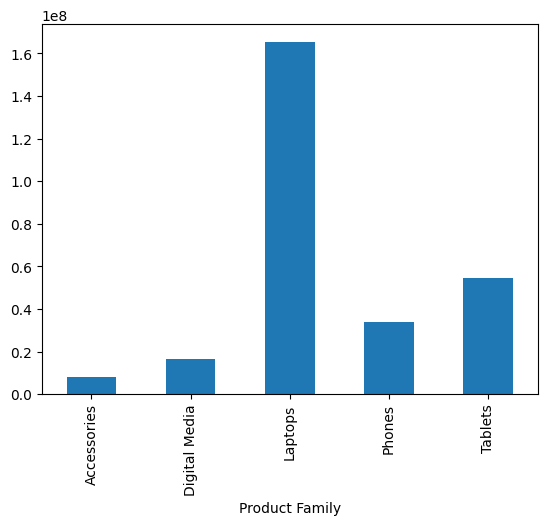

In [16]:
data.groupby('Product Family')['Total Price'].sum().plot(kind='bar')

In [17]:
data.head()

,Absolute Discount,Billing Country,Close Date Year,List Price,Opportunity Type,Product Family,Product Name,Quantity,Sales Price,Total List Price,Total Price
0,0,USA,2029,0,New Business / Add-on,NaN,NaN,0,0,0,0
1,436275,USA,2029,450,Existing Business,Phones,Space phone 2,1939,225,872550,436275
2,306600,USA,2029,1600,Existing Business,Laptops,Pro laptop,1533,1400,2452800,2146200
3,9070,USA,2029,100,Existing Business,Accessories,Keyboard,907,90,90700,81630
4,84600,Belgium,2029,550,New Business / Add-on,Phones,Space phone 3,1692,500,930600,846000


- Compare the 'Total Price' distribution for each 'Product Family'

In [29]:
data.groupby('Product Family')['Total Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Product Family,,,,,,,,
Accessories,84.0,9.767673e+04,1.011560e+05,455.0,37217.5,68580.0,121095.0,642150.0
Digital Media,53.0,3.096204e+05,3.981001e+05,2800.0,88200.0,196800.0,310920.0,1981000.0
Laptops,82.0,2.016034e+06,1.434275e+06,80000.0,1259675.0,1787325.0,2488037.5,10221250.0
Phones,57.0,5.936570e+05,4.851708e+05,14000.0,233100.0,436275.0,864500.0,2004500.0
Tablets,69.0,7.893058e+05,8.347671e+05,9000.0,267750.0,654600.0,987700.0,4622300.0
